In [2]:
import sys
import os
import glob 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc

import plotly.express as px
import plotly.graph_objects as go

import collections



## load data
some preprocessing

In [34]:
data_dir = "/cluster/home/taoj/work_dir/eth-capstone/tree-water-deficit/data/tstoy04"
derived_path = "/cluster/home/taoj/work_dir/eth-capstone/tree-water-deficit/data"

In [4]:
twd_tree_series = pd.read_csv(os.path.join(data_dir, "tstoy04_series.csv"), sep = ",")
twd_tree_sites = pd.read_csv(os.path.join(data_dir, "tstoy04_sites.csv"), sep = ",")


In [5]:
series_file_path = glob.glob(os.path.join(data_dir, "SeparateSeries/tstoy04_*.csv"))
series_name = [os.path.basename(series).replace(".csv", "").replace("tstoy04_", "")for series in series_file_path]
series_file_dfs = {series_name[i]: pd.read_csv(series_file_path[i], sep=",") for i in range(len(series_file_path))}

In [6]:
twd_tree_series["series_no"] = twd_tree_series.index+ 1
twd_tree_series_sites = twd_tree_series.merge(twd_tree_sites, left_on="site", 
                                              right_on = "site_name", how="left")
twd_tree_series_sites["species_site"] = twd_tree_series_sites["species"] + "_" + twd_tree_series_sites["site_name"]

In [7]:
twd_tree_series_sites.head()

series           species            site  series_no       site_name  \
0      19   Fagus sylvatica  Bachtel-Forest          1  Bachtel-Forest   
1     120   Quercus petraea   Bueren-Forest          2   Bueren-Forest   
2     121   Quercus petraea   Bueren-Forest          3   Bueren-Forest   
3     136  Carpinus betulus  Bursins-Forest          4  Bursins-Forest   
4     137  Carpinus betulus  Bursins-Forest          5  Bursins-Forest   

   site_longitude  site_latitude  site_easting  site_northing  \
0         8.89016       47.29413  2.709787e+06   1.239153e+06   
1         7.67722       47.46111  2.617991e+06   1.256731e+06   
2         7.67722       47.46111  2.617991e+06   1.256731e+06   
3         6.28370       46.45552  2.511271e+06   1.145564e+06   
4         6.28370       46.45552  2.511271e+06   1.145564e+06   

   mch_ind_closest   mch_easting  mch_northing  mch_elevation  \
0            46975  2.710088e+06  1.239223e+06     882.140575   
1            28625  2.618033e+06  1.256244e+06     537.765575   
2            28625  2.618033e+06  1.256244e+06     537.765575   
3             6353  2.511187e+06  1.145981e+06     643.515575   
4             6353  2.511187e+06  1.145981e+06     643.515575   

   mch_site_eucldist                     species_site  
0         308.935980   Fagus sylvatica_Bachtel-Forest  
1         488.442974    Quercus petraea_Bueren-Forest  
2         488.442974    Quercus petraea_Bueren-Forest  
3         425.379683  Carpinus betulus_Bursins-Forest  
4         425.379683  Carpinus betulus_Bursins-Forest

In [8]:
series_file_dfs =collections.OrderedDict(sorted(series_file_dfs.items()))
series_file_dfs_all_info = []
for i, df in enumerate(series_file_dfs.values()):
    df = df.sort_values(by = "ts", ascending= True)
    df['series'] = series_name[i]
    df['site_name'] = twd_tree_series_sites.loc[twd_tree_series_sites['series_no'] == i+1, 'site_name'].values[0]
    df['species'] = twd_tree_series_sites.loc[twd_tree_series_sites['series_no'] == i+1, 'species'].values[0]
    df["series_no"] = i+1
    # calculate Yt-Yt-1
    df["Wt"] = df["twd"].diff()
    series_file_dfs_all_info.append(df)

df_series_all = pd.concat(series_file_dfs_all_info, ignore_index=True )

In [9]:
# split year month and store them in separate columns
df_series_all["year"] = df_series_all["ts"].apply(lambda x: int(x.split("-")[0]))
df_series_all["month"] = df_series_all["ts"].apply(lambda x: int(x.split("-")[1]))
df_series_all["year_month"] = df_series_all["year"].astype(str) + "-" + df_series_all["month"].astype(str).str.zfill(2)



In [10]:
df_series_all.head()

ts       twd            pr        at        ws        dp  \
0  2020-01-01  0.000000 -4.967054e-09  0.684757  1.197186 -3.640214   
1  2020-01-02  0.121408 -1.092752e-07  0.213088  1.312338 -4.036302   
2  2020-01-03  0.118271  1.285767e-01  2.009851  2.115951 -0.953911   
3  2020-01-04  0.000000  9.927122e-02  1.573278  3.247398  0.721803   
4  2020-01-05  0.000000 -1.986821e-08 -0.442240  2.159941 -4.094125   

          sr          lr     series       site_name          species  \
0  62.291590  212.325577  series_06  Bachtel-Forest  Fagus sylvatica   
1  60.923900  219.828021  series_06  Bachtel-Forest  Fagus sylvatica   
2  55.859708  275.925156  series_06  Bachtel-Forest  Fagus sylvatica   
3  13.914832  311.878969  series_06  Bachtel-Forest  Fagus sylvatica   
4  62.620516  216.038632  series_06  Bachtel-Forest  Fagus sylvatica   

   series_no        Wt  year  month year_month  
0          1       NaN  2020      1    2020-01  
1          1  0.121408  2020      1    2020-01  
2          1 -0.003137  2020      1    2020-01  
3          1 -0.118271  2020      1    2020-01  
4          1  0.000000  2020      1    2020-01

In [ ]:
df_series_all.to_csv(os.path.join(derived_path, "twd_tree_series_all.csv"),
index = False)
twd_tree_series_sites.to_csv(os.path.join(derived_path, "twd_tree_series_sites.csv"),
                             index = False)

* ts = daily time stamp, from 2020-01-01 till 2022-12-31
* twd = target TWD_norm variable, unprocessed
* pr = precipitation in kg/m^2
* at = air temperature in °C
* ws = wind speed in m/S
* dp = dew point in °C
* sr = net short wave radiation flux in W/m^2
* lr = net long wave radiation flux in W/m^2

## plot site maps

In [11]:
twd_tree_series

series                species                          site  series_no
0       19        Fagus sylvatica                Bachtel-Forest          1
1      120        Quercus petraea                 Bueren-Forest          2
2      121        Quercus petraea                 Bueren-Forest          3
3      136       Carpinus betulus                Bursins-Forest          4
4      137       Carpinus betulus                Bursins-Forest          5
5      138       Carpinus betulus                Bursins-Forest          6
6      139       Carpinus betulus                Bursins-Forest          7
7      193       Corylus avellana           Choeliacher-Orchard          8
8      194       Corylus avellana           Choeliacher-Orchard          9
9      288            Picea abies             Davos-Seehornwald         10
10     347            Picea abies             Davos-Seehornwald         11
11     357            Picea abies             Davos-Seehornwald         12
12     377        Fagus sylvatica               Genolier-Forest         13
13     379        Fagus sylvatica               Genolier-Forest         14
14     380        Fagus sylvatica               Genolier-Forest         15
15     557            Picea abies         Hohtenn-Gampel-Forest         16
16     558            Picea abies         Hohtenn-Gampel-Forest         17
17     664            Picea abies                  Laegeren-Hut         18
18     696       Pinus sylvestris                   Lens-Forest         19
19     817  Pseudotsuga menziesii                   Muri-Forest         20
20     838  Pseudotsuga menziesii                   Muri-Forest         21
21     849        Fagus sylvatica               Neunkirch-North         22
22     850        Fagus sylvatica               Neunkirch-North         23
23     853        Quercus petraea           Neunkirch-Southeast         24
24     854        Quercus petraea           Neunkirch-Southeast         25
25     856        Fagus sylvatica           Neunkirch-Southwest         26
26     937       Pinus sylvestris              Pfynwald-Control         27
27     970            Picea abies  Pfynwald-Illgraben-Northwest         28
28     971            Picea abies  Pfynwald-Illgraben-Northwest         29
29    1009       Pinus sylvestris           Pfynwald-Irrigation         30
30    1010       Pinus sylvestris           Pfynwald-Irrigation         31
31    1011       Pinus sylvestris           Pfynwald-Irrigation         32
32    1114        Fagus sylvatica                  Saillon-A860         33
33    1169        Fagus sylvatica                  Schaenis-low         34
34    1180            Picea abies              Schmitten-Forest         35
35    1181            Picea abies              Schmitten-Forest         36
36    1182            Picea abies              Schmitten-Forest         37
37    1183            Picea abies              Schmitten-Forest         38
38    1184            Picea abies              Schmitten-Forest         39
39    1186            Picea abies              Schmitten-Forest         40
40    1187            Picea abies              Schmitten-Forest         41
41    1232        Fagus sylvatica               Sihlwald-Forest         42

In [12]:
twd_tree_series_sites.head()

series           species            site  series_no       site_name  \
0      19   Fagus sylvatica  Bachtel-Forest          1  Bachtel-Forest   
1     120   Quercus petraea   Bueren-Forest          2   Bueren-Forest   
2     121   Quercus petraea   Bueren-Forest          3   Bueren-Forest   
3     136  Carpinus betulus  Bursins-Forest          4  Bursins-Forest   
4     137  Carpinus betulus  Bursins-Forest          5  Bursins-Forest   

   site_longitude  site_latitude  site_easting  site_northing  \
0         8.89016       47.29413  2.709787e+06   1.239153e+06   
1         7.67722       47.46111  2.617991e+06   1.256731e+06   
2         7.67722       47.46111  2.617991e+06   1.256731e+06   
3         6.28370       46.45552  2.511271e+06   1.145564e+06   
4         6.28370       46.45552  2.511271e+06   1.145564e+06   

   mch_ind_closest   mch_easting  mch_northing  mch_elevation  \
0            46975  2.710088e+06  1.239223e+06     882.140575   
1            28625  2.618033e+06  1.256244e+06     537.765575   
2            28625  2.618033e+06  1.256244e+06     537.765575   
3             6353  2.511187e+06  1.145981e+06     643.515575   
4             6353  2.511187e+06  1.145981e+06     643.515575   

   mch_site_eucldist                     species_site  
0         308.935980   Fagus sylvatica_Bachtel-Forest  
1         488.442974    Quercus petraea_Bueren-Forest  
2         488.442974    Quercus petraea_Bueren-Forest  
3         425.379683  Carpinus betulus_Bursins-Forest  
4         425.379683  Carpinus betulus_Bursins-Forest

In [13]:
fig = px.scatter_geo(twd_tree_series_sites, 
                     lat=twd_tree_series_sites.site_latitude,
                     lon=twd_tree_series_sites.site_longitude,
                     scope='europe',  # Keep Europe as scope for context
                     projection='natural earth',
                    #  hover_name=["site_name", 'species'],
                     hover_data={'species':True,'site_name':True, 'mch_elevation' : True},
                     color="mch_elevation",  # Color by species
                     symbol= "species",
                     center=dict(lat=46.8182, lon=8.2275),  # Switzerland's center coordinates
                     fitbounds="locations",  # Automatically fit bounds to data points

                    )

# Update layout to zoom in on Switzerland
fig.update_geos(
    lataxis_range=[45.8, 47.8],  # Approximate latitude range of Switzerland
    lonaxis_range=[6.0, 10.5],   # Approximate longitude range of Switzerland
    showcountries=True,          # Show country borders
    countrycolor="Black"
)

# Update layout to show two separate legends
fig.update_layout(
    legend_title_text='Species',
    showlegend=True,
    legend=dict(
        title=dict(text='Species'),
        yanchor="top",
        y=1.65,
        xanchor="left",
        x=0.4,
        
    ),
    legend2=dict(
        title=dict(text=''),
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.02
    )
)

# Update traces to create separate legends
# for trace in fig.data:
#     if 'symbol' in trace.name:
#         trace.update(showlegend=True, legendgroup="sites", legendgrouptitle_text="Sites")
#     else:
#         trace.update(showlegend=True, legendgroup="species", legendgrouptitle_text="Species")
        
fig.show()

In [36]:
# should take a look at the other covariates like temperature, precipitation etc across time

## plot TWD of a series over time

In [14]:
series_example = series_file_dfs['series_01']
series_example.head()

ts       twd            pr        at        ws        dp  \
0  2020-01-01  0.000000 -4.967054e-09  0.684757  1.197186 -3.640214   
1  2020-01-02  0.121408 -1.092752e-07  0.213088  1.312338 -4.036302   
2  2020-01-03  0.118271  1.285767e-01  2.009851  2.115951 -0.953911   
3  2020-01-04  0.000000  9.927122e-02  1.573278  3.247398  0.721803   
4  2020-01-05  0.000000 -1.986821e-08 -0.442240  2.159941 -4.094125   

          sr          lr  
0  62.291590  212.325577  
1  60.923900  219.828021  
2  55.859708  275.925156  
3  13.914832  311.878969  
4  62.620516  216.038632

why precipitation can be minus?

In [15]:
# for i in range(0, 41):

fig = px.line(series_example, x='ts', y="twd", )
# fig = px.line(series_example, x='ts', y=log["pr"])
fig.show()

In [ ]:
len(twd_tree_series_sites.site.unique())
len(twd_tree_series_sites.species.unique())

7

In [17]:
fig = px.line(df_series_all, x='ts', y="twd", color = "series", facet_row="site_name",
            facet_col = "year",
              symbol="species",
            #  
            facet_row_spacing = 0.01,
                # line_group = "species" 
                )

fig.update_traces(marker=dict(size=3))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])) 
fig.update_layout(
    height=4000,
    width=800,
)

fig.update_xaxes(matches=None)
fig.update_yaxes(matches=None)

fig.show()


In [20]:
df_series_all

ts       twd            pr         at        ws        dp  \
0      2020-01-01  0.000000 -4.967054e-09   0.684757  1.197186 -3.640214   
1      2020-01-02  0.121408 -1.092752e-07   0.213088  1.312338 -4.036302   
2      2020-01-03  0.118271  1.285767e-01   2.009851  2.115951 -0.953911   
3      2020-01-04  0.000000  9.927122e-02   1.573278  3.247398  0.721803   
4      2020-01-05  0.000000 -1.986821e-08  -0.442240  2.159941 -4.094125   
...           ...       ...           ...        ...       ...       ...   
46027  2022-12-27  0.003764  7.890425e-02   4.010645  1.909832  2.355262   
46028  2022-12-28  0.000000  2.787872e-06   3.266429  2.896402 -0.281365   
46029  2022-12-29  0.250309  2.516162e-01   6.377938  3.076757  1.008028   
46030  2022-12-30  0.106996  4.619100e-01   5.292577  2.608761  3.574435   
46031  2022-12-31  0.106996  1.551990e-04  11.198852  3.306487  5.339708   

              sr          lr     series        site_name          species  \
0      62.291590  212.325577  series_06   Bachtel-Forest  Fagus sylvatica   
1      60.923900  219.828021  series_06   Bachtel-Forest  Fagus sylvatica   
2      55.859708  275.925156  series_06   Bachtel-Forest  Fagus sylvatica   
3      13.914832  311.878969  series_06   Bachtel-Forest  Fagus sylvatica   
4      62.620516  216.038632  series_06   Bachtel-Forest  Fagus sylvatica   
...          ...         ...        ...              ...              ...   
46027  26.803715  290.990254  series_23  Sihlwald-Forest  Fagus sylvatica   
46028  48.663056  245.492409  series_23  Sihlwald-Forest  Fagus sylvatica   
46029  37.025694  307.887946  series_23  Sihlwald-Forest  Fagus sylvatica   
46030  32.584284  311.814548  series_23  Sihlwald-Forest  Fagus sylvatica   
46031  49.584983  304.063461  series_23  Sihlwald-Forest  Fagus sylvatica   

       series_no        Wt  year  month year_month  
0              1       NaN  2020      1    2020-01  
1              1  0.121408  2020      1    2020-01  
2              1 -0.003137  2020      1    2020-01  
3              1 -0.118271  2020      1    2020-01  
4              1  0.000000  2020      1    2020-01  
...          ...       ...   ...    ...        ...  
46027         42 -0.051168  2022     12    2022-12  
46028         42 -0.003764  2022     12    2022-12  
46029         42  0.250309  2022     12    2022-12  
46030         42 -0.143313  2022     12    2022-12  
46031         42  0.000000  2022     12    2022-12  

[46032 rows x 16 columns]

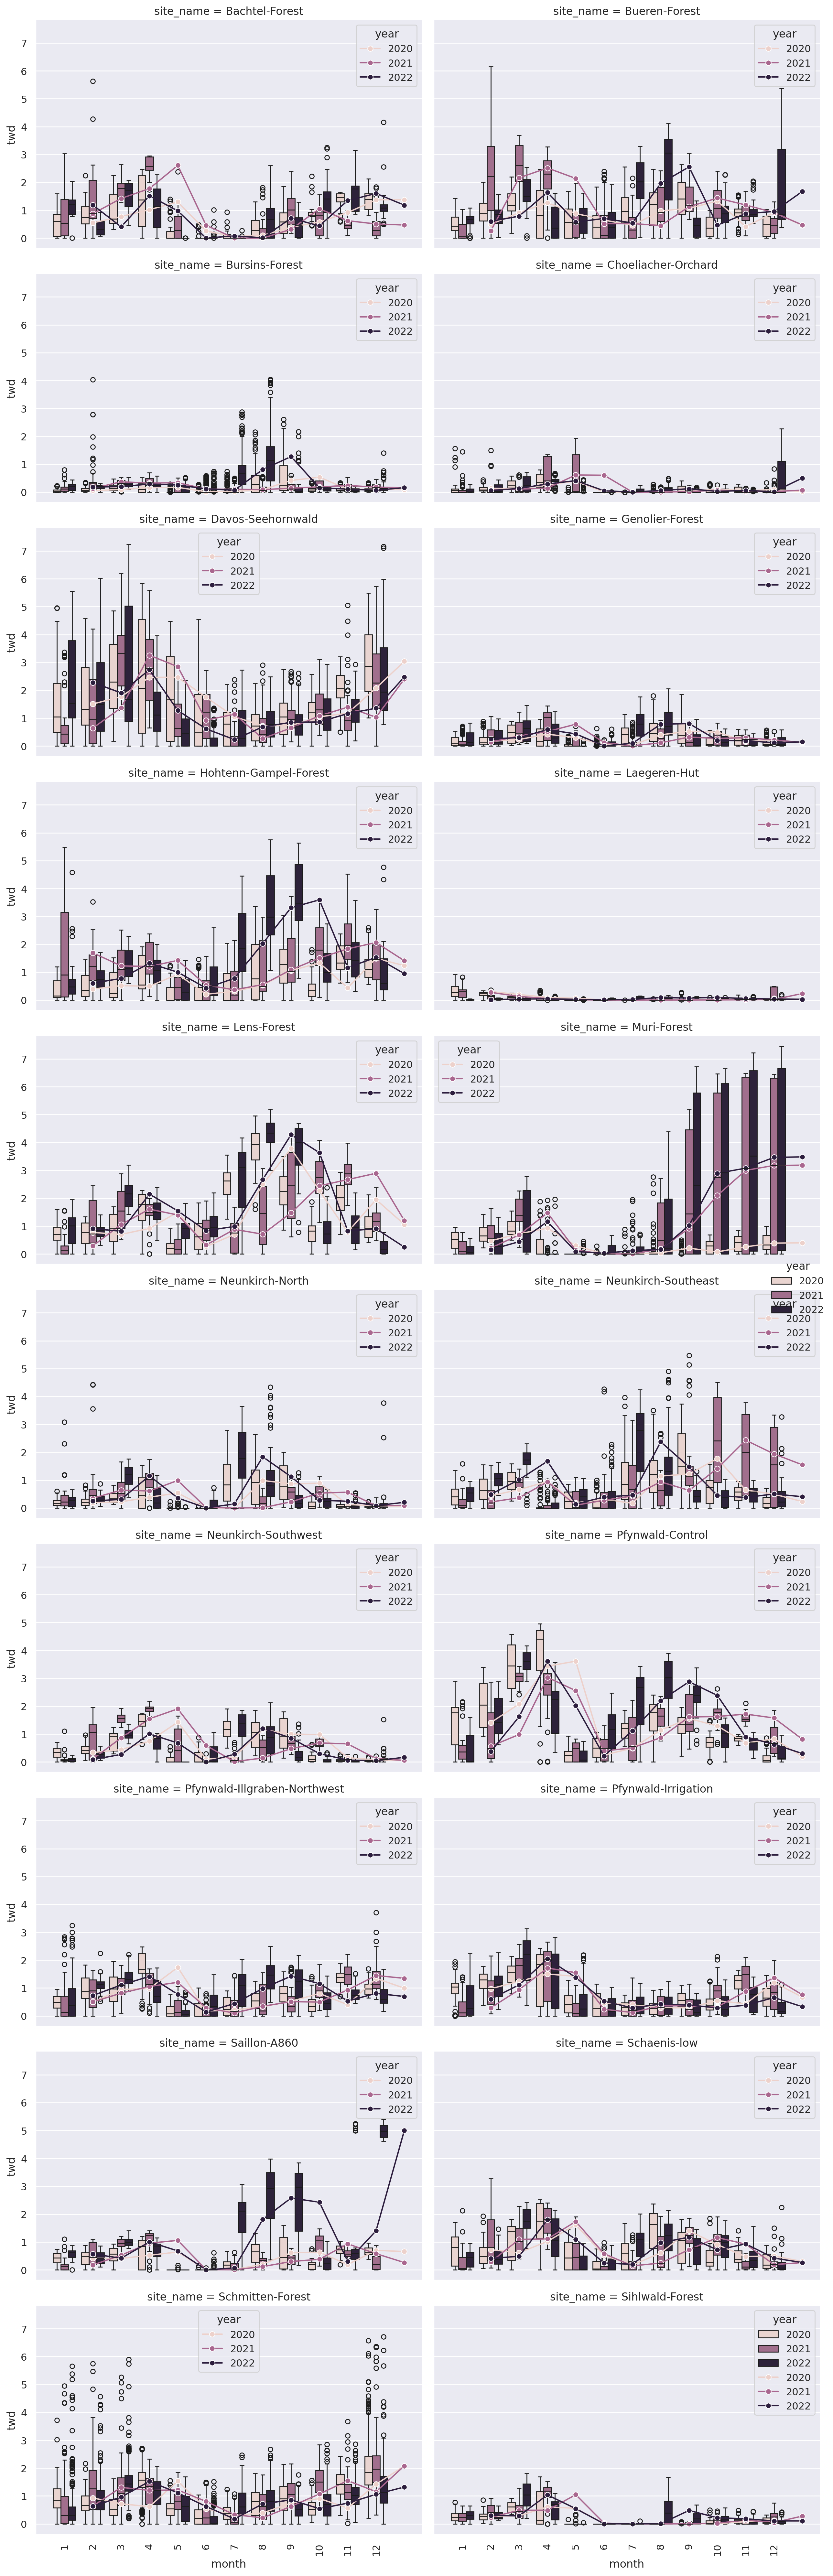

In [32]:
sns.set_theme(rc={'figure.figsize':(12,20),'figure.dpi': 200})

# Calculate monthly means for each site and year
monthly_means = df_series_all.groupby(['site_name', 'year', 'month'])['twd'].mean().reset_index()

# Create the plot
g = sns.catplot(
    data=df_series_all,
    x="month", y="twd", hue="year",
    col="site_name", kind='box', col_wrap=2,
    height=4, aspect=1.5
)

# Add line plots for means on each subplot
for ax in g.axes.flat:
    site = ax.get_title().split('=')[-1].strip()
    sns.lineplot(
        data=monthly_means[monthly_means['site_name'] == site],
        x='month', y='twd', hue='year',
        marker='o', ax=ax
    )

# Rotate x-axis labels
g.tick_params(axis = 'x',
which = "both", rotation = 90)

# Adjust layout to prevent label overlap
plt.tight_layout()


In [113]:
from scipy.spatial import distance
# compute euclidean distance of twd of same species in the same site , the same year 
rep_pair = df_series_all[["site_name", "species", "year", "series"]].drop_duplicates().\
    groupby(["site_name", "species", "year"])["series"].apply(list).reset_index(drop = False)
# rep_pair = rep_pair[rep_pair["series"]>1]
df_list= []
for i, row in rep_pair.iterrows():
    if len(row["series"]) <=1:
        continue
    df_series_sub = df_series_all[(df_series_all["site_name"]== row["site_name"]) &
                                 (df_series_all["species"]== row["species"]) &
                                 (df_series_all["year"]== row["year"])].pivot(index="series", columns="ts", values="twd")
                                  
    euc_dist_mtx = distance.cdist(np.array(df_series_sub), np.array(df_series_sub), 'euclidean')
    dist_list = list(euc_dist_mtx[np.triu_indices(len(row["series"]), k=1)])
    ln = len(dist_list)

    df_euc = pd.DataFrame({
    "year" :[row['year']] * (ln),
    "species" : [row['species']] * (ln),
    "site_name" : [row['site_name']] *  (ln),
    "euclidean_dis" : dist_list
    })  
    df_list.append(df_euc)
    # ax = plt.boxplot(euc_dist_mtx[np.triu_indices(len(row["series"]), k=1)],
    # orientation = 'horizontal')
    # plt.title(f"{row['site_name']}_{row['species']}_{row['year']}")
    # plt.xlabel("Euclidean distance of TWD")
    # plt.show()
    
    


/scratch/tmp.45497121.taoj/ipykernel_275342/4223870171.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, 'Bueren-Forest_\nQuercus petraea'),
 Text(1, 0, 'Bursins-Forest_\nCarpinus betulus'),
 Text(2, 0, 'Choeliacher-Orchard_\nCorylus avellana'),
 Text(3, 0, 'Davos-Seehornwald_\nPicea abies'),
 Text(4, 0, 'Genolier-Forest_\nFagus sylvatica'),
 Text(5, 0, 'Hohtenn-Gampel-Forest_\nPicea abies'),
 Text(6, 0, 'Muri-Forest_\nPseudotsuga menziesii'),
 Text(7, 0, 'Neunkirch-North_\nFagus sylvatica'),
 Text(8, 0, 'Neunkirch-Southeast_\nQuercus petraea'),
 Text(9, 0, 'Pfynwald-Illgraben-Northwest_\nPicea abies'),
 Text(10, 0, 'Pfynwald-Irrigation_\nPinus sylvestris'),
 Text(11, 0, 'Schmitten-Forest_\nPicea abies')]

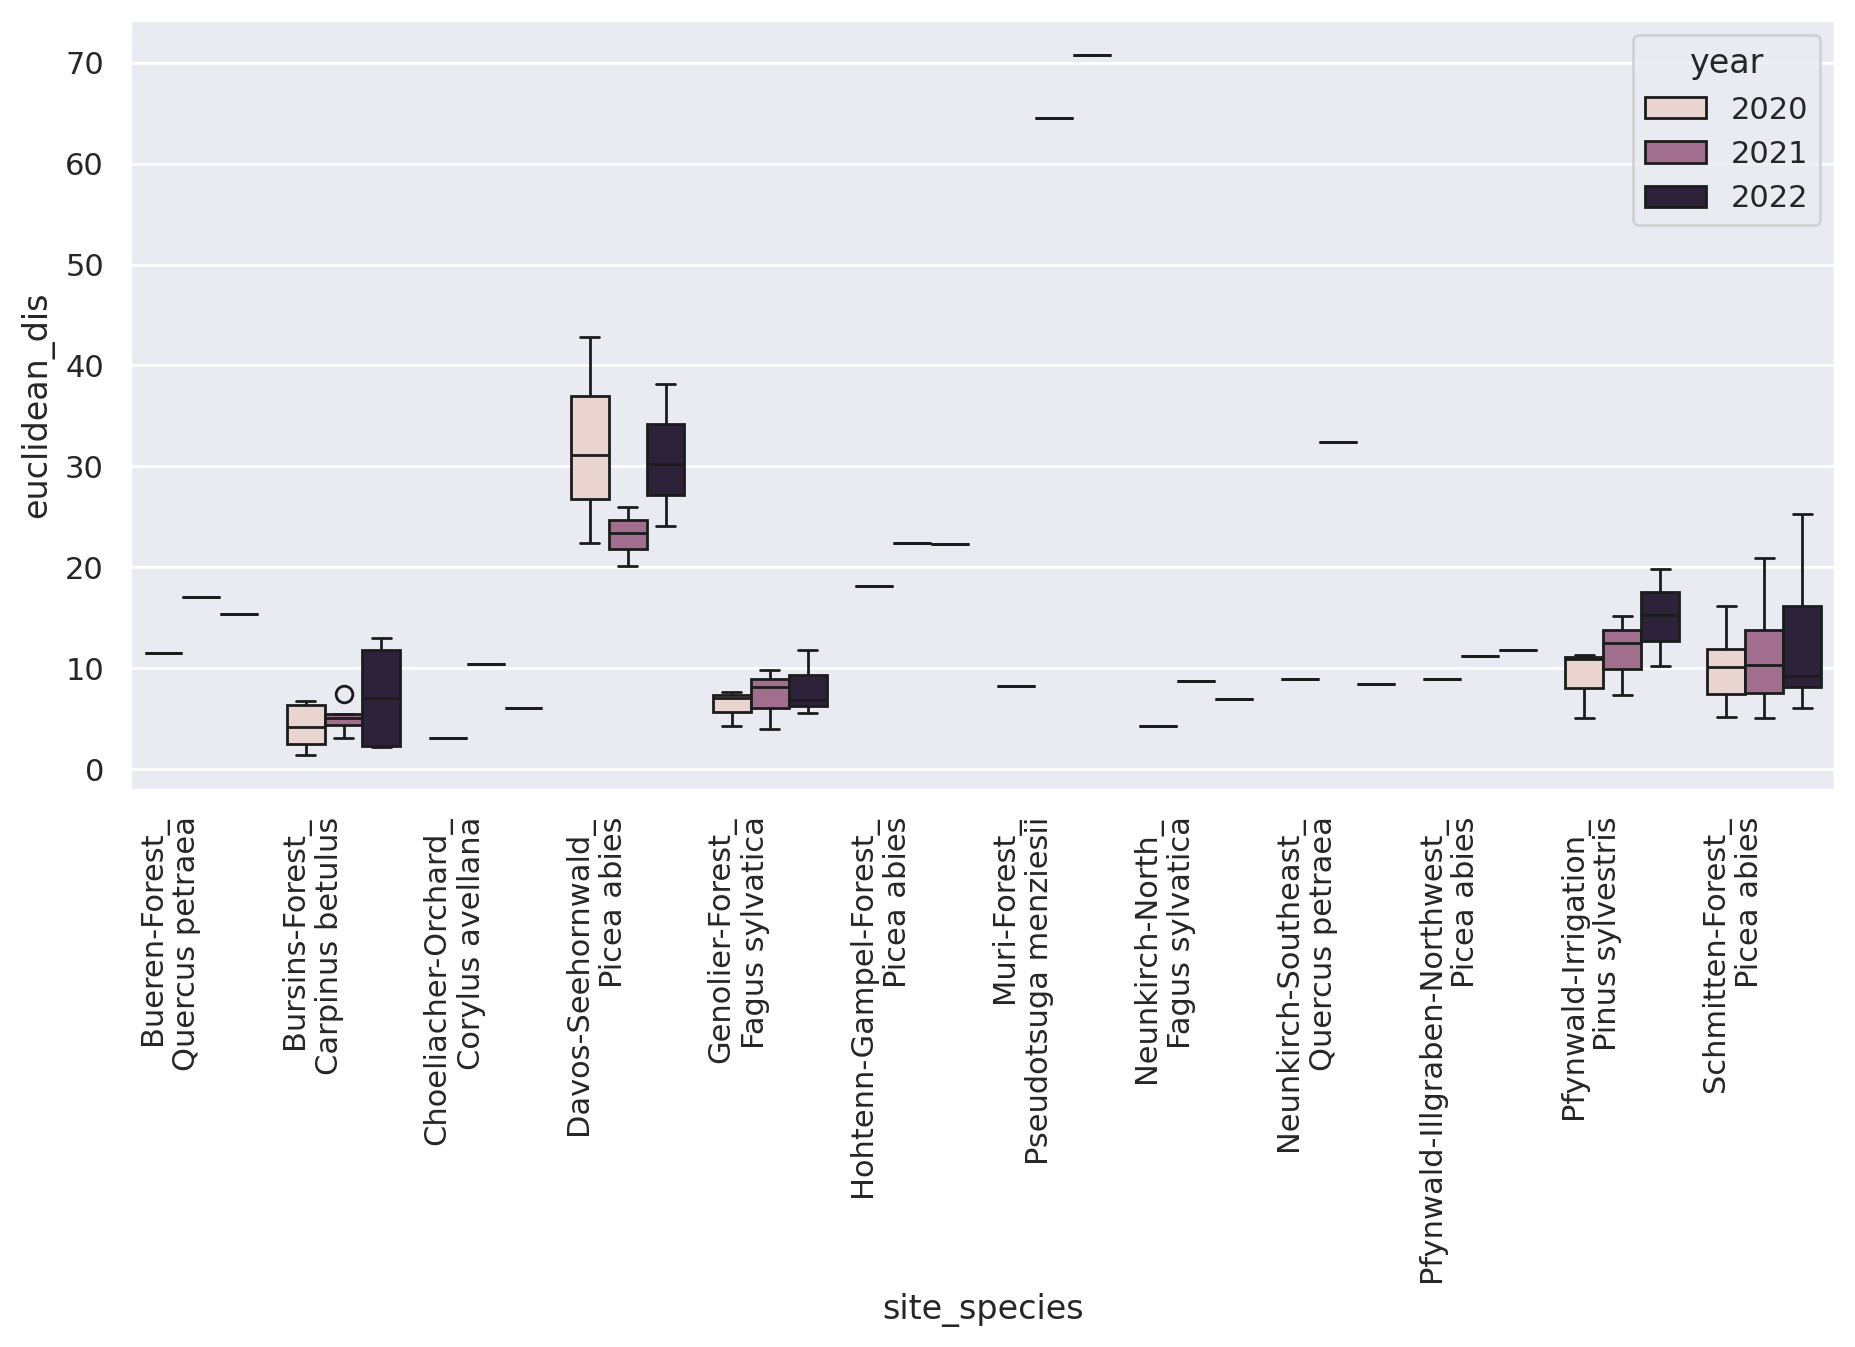

In [119]:
sns.set_theme(rc={'figure.figsize':(11,5),'figure.dpi': 200})
df_euc_all = pd.concat(df_list)
df_euc_all["site_species"] = df_euc_all["site_name"] + "_\n" + df_euc_all["species"]

ax = sns.boxplot(data=df_euc_all, x="site_species", y="euclidean_dis",
hue = "year")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

from this data we learned that in year 2021 and 2022, the same species "Psudotsuga mnzisii", the same site "Multi-Forest" has high deviation, therefore we exclude them from training, and take the median expression of other repeated sample

In [38]:
fig = px.line(df_series_all, x='ts', y="Wt", color = "series", facet_row="site_name",
            facet_col = "year",
              symbol="species",
            #  
            facet_row_spacing = 0.01,
                # line_group = "species" 
                )

fig.update_traces(marker=dict(size=3))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])) 
fig.update_layout(
    height=4000,
    width=800,
)

fig.update_xaxes(matches=None)
fig.update_yaxes(matches=None)

fig.show()

- Understand correlation? 
- compute PCA?
- read some paper about how to split the data? 
- auto-correlation?
- compute statistics? 
- how to use other variables? 

### calculate autocorrelation
- try for 2020

In [18]:
# Importing statsmodel dependencies

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import acf
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.tsaplots import plot_acf


In [19]:
df_series_all.loc[(df_series_all.series_no== 1) & (df_series_all.year == 2020), "twd"].autocorr(lag=3)

np.float64(0.6487688681585871)

In [20]:
n_lag = 50
acf_arrays= np.zeros(shape = (3, 42, n_lag+1))

for year_idx in range(0,3):
    for series_no in range(1,43):
        acf_arrays[year_idx, series_no-1, :] = acf(df_series_all.loc[(df_series_all.series_no== series_no) & (df_series_all.year == 2020+year_idx), "twd"], fft=False, nlags=n_lag)



df_auto_corr = pd.DataFrame(acf_arrays[0,:,:])
df_auto_corr['series_no'] = np.arange(1,43)
df_auto_corr_melt = df_auto_corr.melt(id_vars=['series_no'], var_name='lag', value_name='acf')
df_auto_corr_melt = df_auto_corr_melt.merge(twd_tree_series_sites[['series_no', 'site_name', 'species']], on='series_no', how='left')

In [21]:
mean_acf = pd.DataFrame(df_auto_corr_melt.groupby(['lag', 'site_name', "species"]).acf.mean()).reset_index()
mean_std = pd.DataFrame(df_auto_corr_melt.groupby(['lag', 'site_name', "species"]).acf.std()).reset_index()

mean_acf['std'] = mean_std['acf']
mean_acf = mean_acf.loc[mean_acf.acf!=0,]

In [22]:
mean_acf.loc[(mean_acf["species"] == "Fagus sylvatica") & (mean_acf["site_name"] == "Sihlwald-Forest") , ]
twd_tree_series_sites.loc[(twd_tree_series_sites["species"] == "Fagus sylvatica") & (twd_tree_series_sites["site_name"] == "Sihlwald-Forest") , ]

series          species             site  series_no        site_name  \
41    1232  Fagus sylvatica  Sihlwald-Forest         42  Sihlwald-Forest   

    site_longitude  site_latitude  site_easting  site_northing  \
41         8.56111       47.25056  2.684971e+06   1.233901e+06   

    mch_ind_closest   mch_easting  mch_northing  mch_elevation  \
41            41819  2.684597e+06  1.233941e+06     722.265575   

    mch_site_eucldist                     species_site  
41         375.727303  Fagus sylvatica_Sihlwald-Forest

In [24]:
# acf_arrays.mean(axis =0)
# acf_arrays.std(axis =0)


# fig2 = px.line(y = acf_arrays[0].mean(axis =0), x= np.arange(n_lag+1),
# error_y = acf_arrays[0].std(axis =0), labels = "2020 mean")
fig2 = go.Figure()
fig2.add_trace(
    go.Scatter(
        x=np.arange(n_lag+1),
        y=acf_arrays[0].mean(axis=0),
        error_y=dict(array=acf_arrays[0].std(axis=0)),
        name='2020 Mean',
        line=dict(color='blue', width=2),
        showlegend=True
    )
)


# Add second line plot as a trace
fig2.add_trace(
    go.Scatter(
        x=np.arange(n_lag+1),
        y=acf_arrays[1].mean(axis=0),
        error_y=dict(array=acf_arrays[1].std(axis=0)),
        name='2021 Mean',
        line=dict(color='black', width=2),
        showlegend=True
    )
)

# Add third line plot as a trace
fig2.add_trace(
    go.Scatter(
        x=np.arange(n_lag+1),
        y=acf_arrays[2].mean(axis=0),
        error_y=dict(array=acf_arrays[2].std(axis=0)),
        name='2022 Mean',
        line=dict(color='red', width=2),
        showlegend=True
    )
)

fig2.show()





In [25]:
# Create first figure
fig = px.line(mean_acf, x="lag", y="acf",
              color="species", symbol="site_name",
              error_y="std", facet_row="species",
              )

# Add second line plot as a trace
fig.add_trace(
    go.Scatter(
        x=np.arange(n_lag+1),
        y=acf_arrays.mean(axis=0),
        error_y=dict(array=acf_arrays.std(axis=0)),
        name='Overall Mean',
        line=dict(color='black', width=2),
        showlegend=True
    )
)

fig.update_traces(opacity=.4)

# Update layout if needed
fig.update_layout(
    title='Autocorrelation Function by Species and Site',
    xaxis_title='Lag',
    yaxis_title='ACF',
    height = 2000, 
    width = 800,
    
)

fig.show()

n = 5 is good value for autocorrelation

#### compute correlation of the features with twd

In [39]:
corr = df_series_all[["twd", "pr", "at", "ws", "dp", "sr", "lr", "Wt"]].corr()

<Axes: >

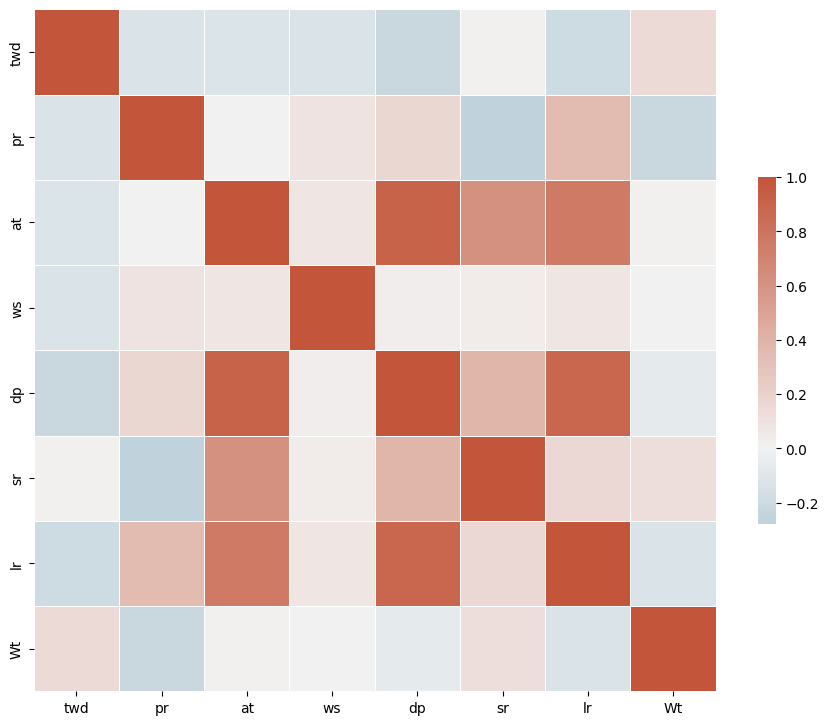

In [40]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap= cmap, vmax= 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## test a few models

start from simple model 
- understand the covariance, mean a little better
- gaussian process 

- random walk 
Yt = Yt-1 + Wt

- autoregressive
- pick out outliers

In [ ]:
# compute delta Yt-Yt-1
# Wt is clearly not Gaussian ...
df_series_all["Wt"] = df_series_all.

In [29]:
df_series_all.head(10)

ts       twd            pr        at        ws        dp  \
0  2020-01-01  0.000000 -4.967054e-09  0.684757  1.197186 -3.640214   
1  2020-01-02  0.121408 -1.092752e-07  0.213088  1.312338 -4.036302   
2  2020-01-03  0.118271  1.285767e-01  2.009851  2.115951 -0.953911   
3  2020-01-04  0.000000  9.927122e-02  1.573278  3.247398  0.721803   
4  2020-01-05  0.000000 -1.986821e-08 -0.442240  2.159941 -4.094125   
5  2020-01-06  0.000000  3.880511e-10  1.900865  1.479226 -5.472837   
6  2020-01-07  0.593406  2.411429e-02  1.480216  2.514120 -1.105571   
7  2020-01-08  0.557187 -6.457170e-07  3.140700  2.099829 -7.224881   
8  2020-01-09  0.918142 -1.182159e-06  5.119999  1.631017 -5.251706   
9  2020-01-10  1.269509  5.132516e-03  3.655803  3.022984 -0.587912   

          sr          lr     series       site_name          species  \
0  62.291590  212.325577  series_06  Bachtel-Forest  Fagus sylvatica   
1  60.923900  219.828021  series_06  Bachtel-Forest  Fagus sylvatica   
2  55.859708  275.925156  series_06  Bachtel-Forest  Fagus sylvatica   
3  13.914832  311.878969  series_06  Bachtel-Forest  Fagus sylvatica   
4  62.620516  216.038632  series_06  Bachtel-Forest  Fagus sylvatica   
5  63.572741  220.306782  series_06  Bachtel-Forest  Fagus sylvatica   
6  26.014536  265.315427  series_06  Bachtel-Forest  Fagus sylvatica   
7  48.464034  265.264362  series_06  Bachtel-Forest  Fagus sylvatica   
8  58.383674  248.506977  series_06  Bachtel-Forest  Fagus sylvatica   
9  39.215077  289.792323  series_06  Bachtel-Forest  Fagus sylvatica   

   series_no  year  month year_month  
0          1  2020      1    2020-01  
1          1  2020      1    2020-01  
2          1  2020      1    2020-01  
3          1  2020      1    2020-01  
4          1  2020      1    2020-01  
5          1  2020      1    2020-01  
6          1  2020      1    2020-01  
7          1  2020      1    2020-01  
8          1  2020      1    2020-01  
9          1  2020      1    2020-01